<a href="https://colab.research.google.com/github/Chediak/common-master-ai/blob/main/neogrid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ace_tools

RMSE (Root Mean Square Error): 1.638125852423048e-13


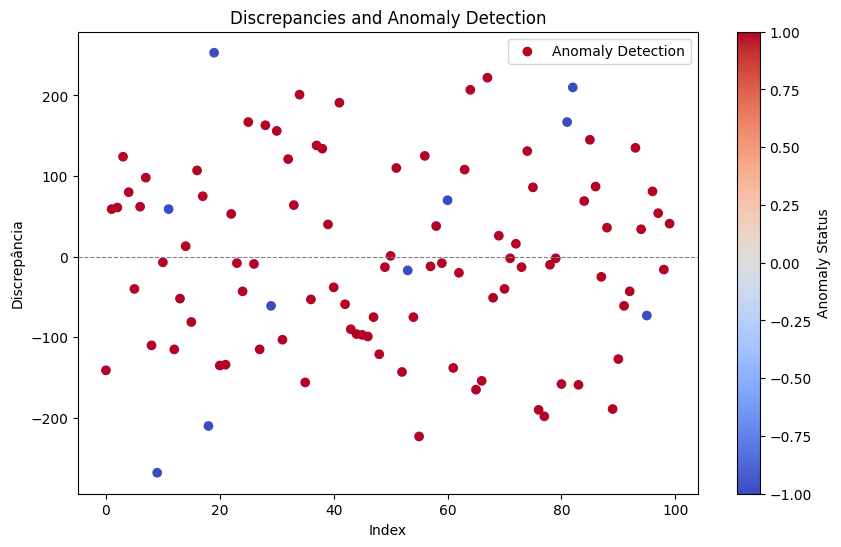

    Canal Holding Investigação  Inventário Inicial  Sell In  Sell Out  \
0  DIS VI          DISTRIB RIO                 344      399       258   
1  DIS VI          DISTRIB RIO                 280      330       389   
2  DIS VI          DISTRIB RIO                 412      223       284   
3  DIS VI          DISTRIB RIO                 258      229       353   
4  DIS VI          DISTRIB RIO                 400      355       435   
5  DIS VI          DISTRIB RIO                 466      299       259   
6  DIS VI          DISTRIB RIO                 281      385       447   
7  DIS VI          DISTRIB RIO                 485      296       394   
8  DIS VI          DISTRIB RIO                 406      417       307   
9  DIS VI          DISTRIB RIO                 415      479       211   

   Discrepância  Anomaly  
0          -141        1  
1            59        1  
2            61        1  
3           124        1  
4            80        1  
5           -40        1  
6      

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Simulating the dataset based on the provided structure
data = {
    "Canal": ["DIS VI"] * 100,
    "Holding Investigação": ["DISTRIB RIO"] * 100,
    "Inventário Inicial": np.random.randint(200, 500, 100),
    "Sell In": np.random.randint(200, 500, 100),
    "Sell Out": np.random.randint(200, 500, 100),
    "Inventário Rolado": np.random.randint(200, 500, 100),
    "Inventário Inf. Rolado": np.random.randint(200, 500, 100),
}

df = pd.DataFrame(data)

# Creating a discrepancy feature
df["Discrepância"] = df["Sell Out"] - df["Sell In"]

# Splitting the dataset into features and target
X = df[["Inventário Inicial", "Sell In", "Sell Out", "Inventário Rolado", "Inventário Inf. Rolado"]]
y = df["Discrepância"]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model performance
errors = y_test - y_pred
rmse = np.sqrt(np.mean(errors**2))

# Printing RMSE
print(f"RMSE (Root Mean Square Error): {rmse}")

# Anomaly detection using Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(X)

# Visualizing the discrepancies and anomalies
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Discrepância"], c=df["Anomaly"], cmap='coolwarm', label='Anomaly Detection')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Discrepancies and Anomaly Detection")
plt.xlabel("Index")
plt.ylabel("Discrepância")
plt.colorbar(label="Anomaly Status")
plt.legend()
plt.show()

# Displaying a sample of the data
df_sample = df[["Canal", "Holding Investigação", "Inventário Inicial", "Sell In", "Sell Out", "Discrepância", "Anomaly"]]
print(df_sample.head(10))

RMSE do modelo de previsão de Crescimento: 1.81


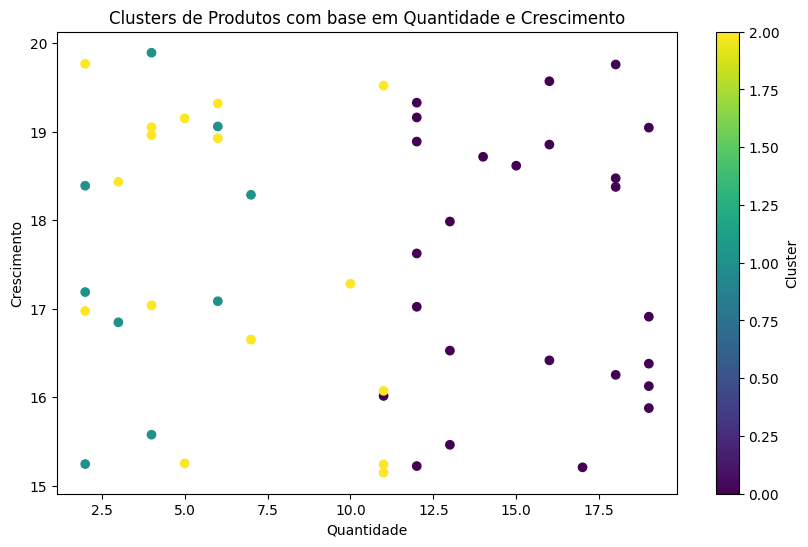

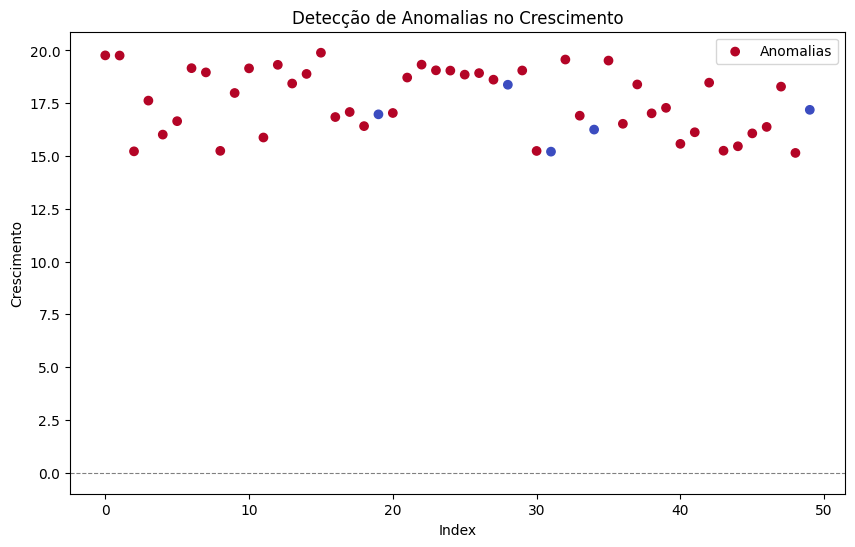

   Codigo_Barras  Quantidade  Preco_Unitario  Preco_Medio  Crescimento  \
0  7622210571805           2       11.648573     0.995738    19.767123   
1  7622210571805          18       19.571359     0.875681    19.759846   
2  7622210571805          12       19.412628     0.999327    15.222380   
3  7622210571805          12       16.159357     0.877796    17.624838   
4  7622210571805          11       16.152841     0.937324    16.014760   
5  7622210571805           7       13.613121     0.951004    16.651283   
6  7622210571805          12       16.437773     0.914114    19.161690   
7  7622210571805           4       12.353691     0.979424    18.961466   
8  7622210571805           2       14.500304     0.846379    15.244867   
9  7622210571805          13       16.058331     0.922985    17.985585   

   Proporcao_Preco_Quantidade  Diferenca_Preco  Anomalia  Cluster  
0                    5.824286       -10.652835         1        2  
1                    1.087298       -18.695677   

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando dados com base na tabela da imagem
data = {
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Preco_Medio": np.random.uniform(0.8, 1.0, 50),
    "Crescimento": np.random.uniform(15, 20, 50)
}

df = pd.DataFrame(data)

# Criando novas métricas
df["Proporcao_Preco_Quantidade"] = df["Preco_Unitario"] / df["Quantidade"]
df["Diferenca_Preco"] = df["Preco_Medio"] - df["Preco_Unitario"]

# Detecção de Anomalias com Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Crescimento"]])

# Previsão de Crescimento com Regressão Linear
X = df[["Quantidade", "Preco_Unitario", "Preco_Medio", "Proporcao_Preco_Quantidade", "Diferenca_Preco"]]
y = df["Crescimento"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Crescimento: {rmse:.2f}")

# Clustering com K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(df[["Quantidade", "Preco_Unitario", "Crescimento"]])

# Visualizando clusters
plt.figure(figsize=(10, 6))
plt.scatter(df["Quantidade"], df["Crescimento"], c=df["Cluster"], cmap='viridis')
plt.title("Clusters de Produtos com base em Quantidade e Crescimento")
plt.xlabel("Quantidade")
plt.ylabel("Crescimento")
plt.colorbar(label="Cluster")
plt.show()

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Crescimento"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Crescimento")
plt.xlabel("Index")
plt.ylabel("Crescimento")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias e clusters
print(df.head(10))


RMSE do modelo de previsão de Quantidade: 5.87


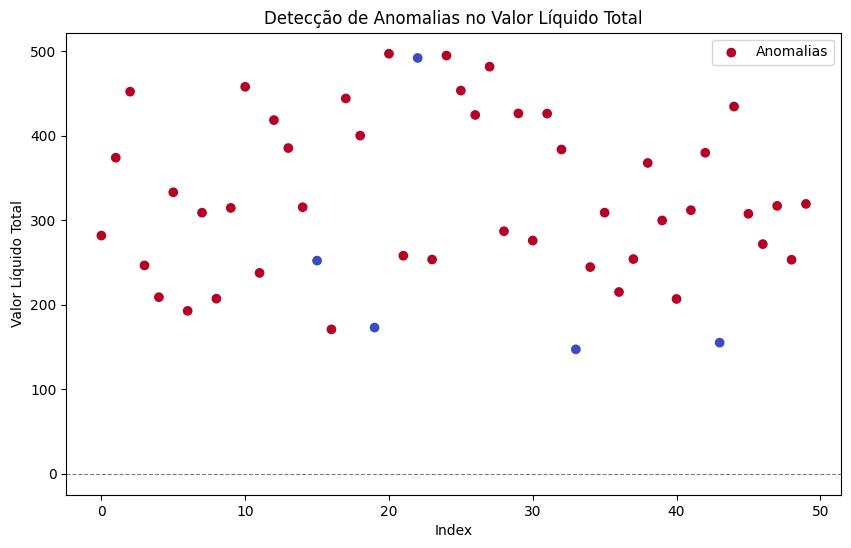

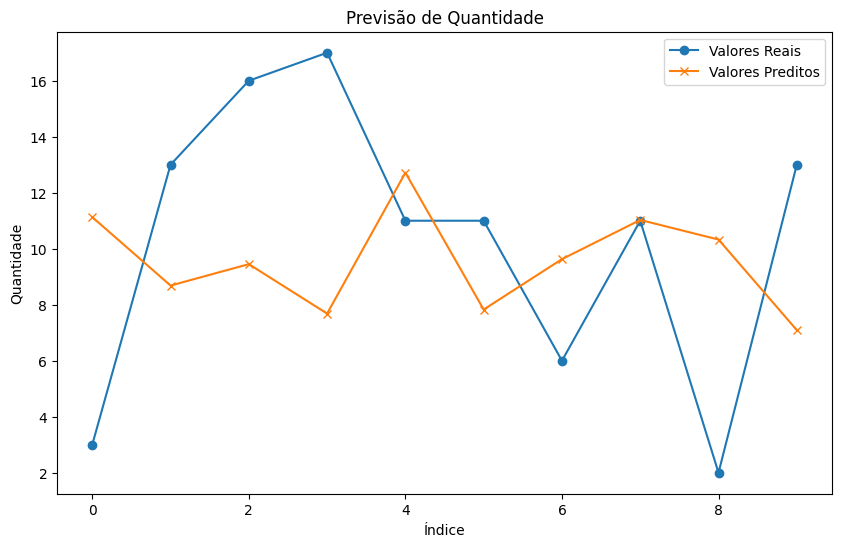

  Data_Transacao  Codigo_Barras  Quantidade  Preco_Unitario  \
0     2024-11-01  7622210571805           6       12.859769   
1     2024-11-02  7622210571805           9       12.665728   
2     2024-11-03  7622210571805           1       13.715228   
3     2024-11-04  7622210571805          10       16.078241   
4     2024-11-05  7622210571805           9       14.436111   
5     2024-11-06  7622210571805          12       11.748338   
6     2024-11-07  7622210571805          11       14.600034   
7     2024-11-08  7622210571805           5       18.652956   
8     2024-11-09  7622210571805           3       15.369309   
9     2024-11-10  7622210571805           4       10.635550   

   Valor_Liquido_Total  Fator_Conversao  Preco_Unitario_Calculado  Anomalia  
0           281.879072         0.969197                 46.979845         1  
1           374.072512         0.916607                 41.563612         1  
2           452.237288         1.184855                452.237288       

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Simulando os dados extraídos do SQL
data = {
    "Data_Transacao": pd.date_range(start="2024-11-01", periods=50, freq="D"),
    "Codigo_Barras": [7622210571805] * 50,
    "Quantidade": np.random.randint(1, 20, 50),
    "Preco_Unitario": np.random.uniform(10, 20, 50),
    "Valor_Liquido_Total": np.random.uniform(100, 500, 50),
    "Fator_Conversao": np.random.uniform(0.8, 1.2, 50)
}

df = pd.DataFrame(data)

# Calculando métricas derivadas
df["Preco_Unitario_Calculado"] = df["Valor_Liquido_Total"] / df["Quantidade"]

# Detecção de Anomalias
iso_forest = IsolationForest(contamination=0.1, random_state=42)
df["Anomalia"] = iso_forest.fit_predict(df[["Quantidade", "Preco_Unitario", "Valor_Liquido_Total"]])

# Análise Preditiva (Regressão Linear para prever `Quantidade`)
X = df[["Preco_Unitario", "Fator_Conversao", "Valor_Liquido_Total"]]
y = df["Quantidade"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Avaliação do modelo
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"RMSE do modelo de previsão de Quantidade: {rmse:.2f}")

# Visualizando as anomalias
plt.figure(figsize=(10, 6))
plt.scatter(df.index, df["Valor_Liquido_Total"], c=df["Anomalia"], cmap='coolwarm', label="Anomalias")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title("Detecção de Anomalias no Valor Líquido Total")
plt.xlabel("Index")
plt.ylabel("Valor Líquido Total")
plt.legend()
plt.show()

# Visualizando os dados previstos vs reais
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Valores Reais", marker='o')
plt.plot(y_pred, label="Valores Preditos", marker='x')
plt.title("Previsão de Quantidade")
plt.xlabel("Índice")
plt.ylabel("Quantidade")
plt.legend()
plt.show()

# Exibindo a tabela com anomalias
print(df.head(10))